# Sentiment Analysis using Deep Learning in Keras

### Importing Required Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array, asarray, zeros
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten, GlobalMaxPooling1D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.layers import Conv1D
from keras.layers import LSTM

### Importing Dataset

Dataset link: https://github.com/vineetdhanawat/twitter-sentiment-analysis/blob/master/datasets/Sentiment%20Analysis%20Dataset%20100000.csv

In [2]:
df = pd.read_csv('Sentiment Analysis Dataset 100000.csv', encoding = 'latin-1', nrows = 10000)

In [3]:
df.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df['SentimentText'][0]

'                     is so sad for my APL friend.............'

In [5]:
df.isnull().values.any()

False

In [6]:
df.shape

(10000, 3)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

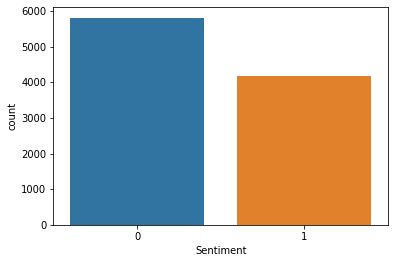

In [7]:
sns.countplot(x = 'Sentiment', data = df)

## Data Processing

In [8]:
def removeAndTag(sen):
    sen = sen.replace('&quot;3', '')
    sen = sen.replace('&quot;', '')
    sen = sen.replace('&lt;3', '')
    sen = sen.replace('&lt;', '')
    sen = sen.replace('&gt;', '')
    return sen

In [9]:
print(df['SentimentText'][120])
print('\n', removeAndTag(df['SentimentText'][120]))

  waahhh now I'm getting sad....miss hub :-'(&quot;&quot;&quot;&quot;&quot;&quot;&quot;&quot;

   waahhh now I'm getting sad....miss hub :-'(


In [10]:
def removeUrl(sen):
    sen = re.sub('http[s]?://\S+', '', sen)
    return sen

In [11]:
print(df['SentimentText'][125])
print('\n', removeUrl(df['SentimentText'][125]))

 - Why must people be so picky. I mean 6 hours work and no dice!? whatï¿½s up with that! http://tumblr.com/xsg1m3ufn

  - Why must people be so picky. I mean 6 hours work and no dice!? whatï¿½s up with that! 


In [12]:
def removeMentioned(sen):
    sen = re.sub('[a-zA-Z0-9]*@[a-zA-Z0-9]*', '', sen)
    return sen

In [13]:
print(df['SentimentText'][146])
print('\n', removeMentioned(df['SentimentText'][146]))

 &quot;The truth is hiding in your eyes&quot; @patita @MissMarian  Paramore ï¿½ Decode @Daninho502  ? http://blip.fm/~5ytke

  &quot;The truth is hiding in your eyes&quot;    Paramore ï¿½ Decode   ? http://blip.fm/~5ytke


In [14]:
def convertShortcutOfNot(sen):
    sen = sen.replace('an\'t', 'an not')
    sen = sen.replace('n\'t', ' not')
    return sen

In [15]:
print(df['SentimentText'][200])
print('\n', convertShortcutOfNot(df['SentimentText'][200]))

 @georgediaz #Magic ..thinking less than 50 % chance Hedo stays in Orlando. He's gonna go for the $$. They all do. Can't blame him though.

  @georgediaz #Magic ..thinking less than 50 % chance Hedo stays in Orlando. He's gonna go for the $$. They all do. Can not blame him though.


In [16]:
print(df['SentimentText'][220])
print('\n', convertShortcutOfNot(df['SentimentText'][220]))

 @Leloz isn't home neither is @sozi1 ... @althani96 U BETTER HAVE IT!!!

  @Leloz is not home neither is @sozi1 ... @althani96 U BETTER HAVE IT!!!


In [17]:
def removeSingleChar(sen):
    sen = re.sub(r"\s+[A-Z]\s+", ' ', sen)
    return sen

In [18]:
print(df['SentimentText'][307])
print('\n', removeSingleChar(df['SentimentText'][307]))

   a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot.

    a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot, a lot.


In [19]:
def removeMultipleSpaceDashAndDot(sen):
    sen = re.sub(r'[.]+', '.', sen)
    sen = re.sub(r'\s+', ' ', sen)
    sen = re.sub(r'[-]+', ' ', sen)
    return sen

In [20]:
print(df['SentimentText'][342])
print('\n', removeMultipleSpaceDashAndDot(df['SentimentText'][342]))

     &lt;--------- my face because i'm missing zoro tonight.

  &lt;  my face because i'm missing zoro tonight.


In [21]:
print(df['SentimentText'][286])
print('\n', removeMultipleSpaceDashAndDot(df['SentimentText'][286]))

          my life is very lazzzzyyyy!!!!!!!            ***********

  my life is very lazzzzyyyy!!!!!!! ***********


In [22]:
print(df['SentimentText'][319])
print('\n', removeMultipleSpaceDashAndDot(df['SentimentText'][319]))

   i'm so cold this morning......       i have chills all over.....   

  i'm so cold this morning. i have chills all over. 


In [23]:
X = []

sentences = list(df['SentimentText'])

for sen in sentences:
    sen = removeAndTag(sen)
    sen = removeUrl(sen)
    sen = removeMentioned(sen)
    sen = convertShortcutOfNot(sen)
    sen = removeSingleChar(sen)
    sen = removeMultipleSpaceDashAndDot(sen)
    X.append(sen)

In [24]:
for sen in range(0, 10):
    print(X[sen], end = '\n\n')

 is so sad for my APL friend.

 missed the New Moon trailer.

 omg its already 7:30 :O

 . Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11. was suposed 2 just get a crown put on (30mins).

 i think mi bf is cheating on me!!! T_T

 or i just worry too much? 

 Juuuuuuuuuuuuuuuuussssst Chillin!!

 Sunny Again Work Tomorrow : | TV Tonight

 handed in my uniform today . i miss you already

 hmmmm. i wonder how she my number  )



In [25]:
y = df['Sentiment']

In [26]:
for sen in range(0, 5):
    print(y[sen], end = ', ')

0, 0, 1, 0, 0, 

In [27]:
y = np.array(list(y))

#### Dataset splitting to train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25,
    random_state = 42
)

In [29]:
print(X_train[2])
print(y_train[2])

#FollowFriday is a ferociously gifted writer whose books &amp; Tweets are magical must reads. Follow &amp; you'll LOVE her too 
1


### Preparing Embedding Layer

In [30]:
tokenizer = Tokenizer(num_words = 50000)
tokenizer.fit_on_texts(X_train)

In [31]:
X_train = tokenizer.texts_to_sequences(X_train)

In [32]:
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
print(sentences[2])
print(X_train[2])
print(len(X_train[2]))

              omg its already 7:30 :O
[40, 8, 3, 4914, 1948, 691, 594, 774, 22, 262, 31, 4915, 276, 1633, 103, 22, 481, 38, 75, 91]
20


In [34]:
maxlen = 100
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

13077


In [35]:
X_train = pad_sequences(
    X_train,
    padding = 'post',
    maxlen = maxlen
)

In [36]:
X_test = pad_sequences(
    X_test,
    padding = 'post',
    maxlen = maxlen
)

#### glove.6B.100d.txt Dataset for GloVe Embedding

dataset link: https://www.kaggle.com/danielwillgeorge/glove6b100dtxt

In [37]:
embed_dictionary = dict()
glv_file = open('glove.6B.100d.txt', encoding='utf8')

In [38]:
for line in glv_file:
    records = line.split()
    word = records[0]
    vector_dim = asarray(records[1:], dtype='float32')
    embed_dictionary[word] = vector_dim
glv_file.close()

In [39]:
embed_matrix = zeros((vocab_size, 100))

In [40]:
embed_matrix[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
for word, index in tokenizer.word_index.items():
    embed_vector = embed_dictionary.get(word)
    if embed_vector is not None:
        embed_matrix[index] = embed_vector

In [42]:
embed_matrix[1]

array([-1.89700007e-01,  5.00239991e-02,  1.90840006e-01, -4.91839983e-02,
       -8.97369981e-02,  2.10060000e-01, -5.49520016e-01,  9.83769968e-02,
       -2.01350003e-01,  3.42409998e-01, -9.26769972e-02,  1.60999998e-01,
       -1.32679999e-01, -2.81599998e-01,  1.87370002e-01, -4.29589987e-01,
        9.60389972e-01,  1.39719993e-01, -1.07809997e+00,  4.05180007e-01,
        5.05389988e-01, -5.50639987e-01,  4.84400004e-01,  3.80439997e-01,
       -2.90549989e-03, -3.49420011e-01, -9.96960029e-02, -7.83680022e-01,
        1.03629994e+00, -2.31399998e-01, -4.71210003e-01,  5.71259975e-01,
       -2.14540005e-01,  3.59580010e-01, -4.83190000e-01,  1.08749998e+00,
        2.85239995e-01,  1.24470003e-01, -3.92480008e-02, -7.67320022e-02,
       -7.63429999e-01, -3.24090004e-01, -5.74899971e-01, -1.08930004e+00,
       -4.18110013e-01,  4.51200008e-01,  1.21119998e-01, -5.13670027e-01,
       -1.33489996e-01, -1.13779998e+00, -2.87680000e-01,  1.67740002e-01,
        5.58040023e-01,  

## Text Classification with Simple Neural Network

In [43]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(Flatten())

In [44]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)

In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1307700   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 1,317,701
Trainable params: 10,001
Non-trainable params: 1,307,700
_________________________________________________________________


In [47]:
hist = model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs = 6,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/6
47/47 [==============================] - 0s 5ms/step - loss: 0.6644 - acc: 0.5935 - val_loss: 0.6327 - val_acc: 0.6580
Epoch 2/6
47/47 [==============================] - 0s 2ms/step - loss: 0.6034 - acc: 0.6892 - val_loss: 0.6206 - val_acc: 0.6687
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 0.5744 - acc: 0.7113 - val_loss: 0.6036 - val_acc: 0.6693
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 0.5532 - acc: 0.7330 - val_loss: 0.5994 - val_acc: 0.6820
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 0.5375 - acc: 0.7447 - val_loss: 0.5957 - val_acc: 0.6840
Epoch 6/6
47/47 [==============================] - 0s 2ms/step - loss: 0.5237 - acc: 0.7538 - val_loss: 0.5939 - val_acc: 0.6887


In [48]:
score = model.evaluate(
    X_test, y_test,
    verbose = 1
)

79/79 [==============================] - 0s 726us/step - loss: 0.5962 - acc: 0.6920


In [49]:
score_train = model.evaluate(X_train, y_train, verbose = 3)
print('train score = ', score_train[0])
print('train acc = ', score_train[1])

train score =  0.5265980362892151
train acc =  0.7545333504676819


In [50]:
score = model.evaluate(X_test, y_test, verbose = 3)
print('test score = ', score[0])
print('test accuracy = ', score[1])

test score =  0.5962023735046387
test accuracy =  0.6919999718666077


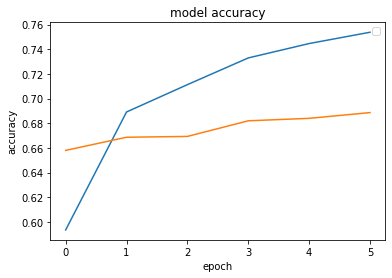

In [51]:
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.show()

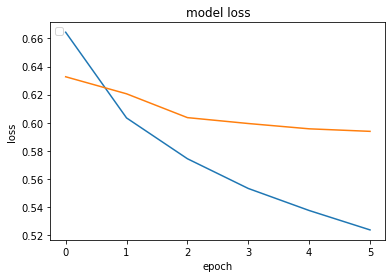

In [52]:
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()

## Text Classification with CNN

In [53]:
model = Sequential()

embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)

In [54]:
model.add(
    Conv1D(128, 5,
        activation = 'relu'
    )
)
model.add(GlobalMaxPooling1D())
model.add(
    Dense(1,
          activation = 'sigmoid'
    )
)

In [55]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1307700   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,371,957
Trainable params: 64,257
Non-trainable params: 1,307,700
_________________________________________________________________


In [57]:
hist = model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs = 6,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/6
47/47 [==============================] - 2s 44ms/step - loss: 0.6321 - accuracy: 0.6448 - val_loss: 0.5887 - val_accuracy: 0.6827
Epoch 2/6
47/47 [==============================] - 2s 40ms/step - loss: 0.5228 - accuracy: 0.7463 - val_loss: 0.5762 - val_accuracy: 0.7053
Epoch 3/6
47/47 [==============================] - 2s 40ms/step - loss: 0.4707 - accuracy: 0.7902 - val_loss: 0.5762 - val_accuracy: 0.7020
Epoch 4/6
47/47 [==============================] - 2s 39ms/step - loss: 0.4253 - accuracy: 0.8195 - val_loss: 0.5708 - val_accuracy: 0.7080
Epoch 5/6
47/47 [==============================] - 2s 39ms/step - loss: 0.3770 - accuracy: 0.8562 - val_loss: 0.5408 - val_accuracy: 0.7247
Epoch 6/6
47/47 [==============================] - 2s 40ms/step - loss: 0.3341 - accuracy: 0.8885 - val_loss: 0.5374 - val_accuracy: 0.7287


In [58]:
score_train_cnn = model.evaluate(X_train, y_train, verbose = 3)
print('train score = ', score_train_cnn[0])
print('train acc = ', score_train_cnn[1])

train score =  0.3403852880001068
train acc =  0.8862666487693787


In [59]:
score_cnn = model.evaluate(
    X_test, y_test,
    verbose = 1
)
print('test score = ', score_cnn[0])
print('test acc = ', score_cnn[1])

79/79 [==============================] - 0s 5ms/step - loss: 0.5445 - accuracy: 0.7280
test score =  0.5444665551185608
test acc =  0.7279999852180481


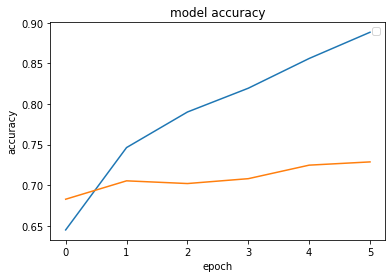

In [60]:
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.show()

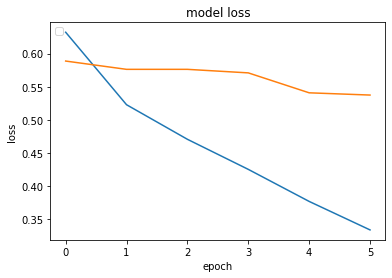

In [61]:
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()

## Text Classification with LSTM

In [62]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(LSTM(128))

In [63]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1307700   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,425,077
Trainable params: 117,377
Non-trainable params: 1,307,700
_________________________________________________________________


In [65]:
hist = model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs = 6,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/6
47/47 [==============================] - 7s 152ms/step - loss: 0.6829 - acc: 0.5785 - val_loss: 0.6831 - val_acc: 0.5733
Epoch 2/6
47/47 [==============================] - 7s 152ms/step - loss: 0.6812 - acc: 0.5785 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 3/6
47/47 [==============================] - 8s 172ms/step - loss: 0.6814 - acc: 0.5785 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 4/6
47/47 [==============================] - 8s 169ms/step - loss: 0.6811 - acc: 0.5785 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 5/6
47/47 [==============================] - 9s 181ms/step - loss: 0.6810 - acc: 0.5785 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 6/6
47/47 [==============================] - 9s 184ms/step - loss: 0.6810 - acc: 0.5785 - val_loss: 0.6824 - val_acc: 0.5733


In [66]:
score_train_lstm = model.evaluate(
    X_train, y_train,
    verbose = 1
)
print('train score = ', score_train_lstm[0])
print('train acc = ', score_train_lstm[1])

235/235 [==============================] - 8s 32ms/step - loss: 0.6811 - acc: 0.5775
train score =  0.6811463832855225
train acc =  0.5774666666984558


In [67]:
score_lstm = model.evaluate(
    X_test, y_test,
    verbose = 1
)
print('test score = ', score_lstm[0])
print('test acc = ', score_lstm[1])

79/79 [==============================] - 2s 28ms/step - loss: 0.6767 - acc: 0.5924
test score =  0.6767327785491943
test acc =  0.5924000144004822


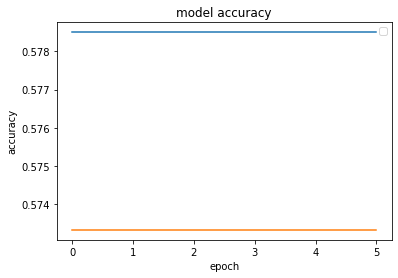

In [68]:
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.show()

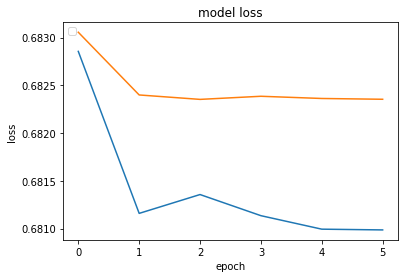

In [69]:
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()

## Text Classification with Bi-Directional LSTM

In [70]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
embed_layer = Embedding(
    vocab_size,
    100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    Bidirectional(
        LSTM(
            100,
            return_sequences = True,
            dropout = 0.50
        ),
        merge_mode = 'concat'
    )
)
model.add(
    TimeDistributed(
        Dense(
            100,
            activation = 'sigmoid'
        )
    )
)
model.add(Flatten())

In [71]:
model.add(
    Dense(
        100,
        activation = 'sigmoid'
    )
)
model.add(
    Dense(
        3,
        activation = 'softmax'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1307700   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          160800    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 2,489,003
Trainable params: 1,181,303
Non-trainable params: 1,307,700
____________________________________

In [73]:
hist = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 6,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/10
47/47 [==============================] - 11s 240ms/step - loss: 1.1251 - acc: 0.1488 - val_loss: 0.8458 - val_acc: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 11s 230ms/step - loss: 0.7255 - acc: 0.1803 - val_loss: 0.7023 - val_acc: 0.4267
Epoch 3/10
47/47 [==============================] - 12s 245ms/step - loss: 0.6977 - acc: 0.2368 - val_loss: 0.7012 - val_acc: 0.4267
Epoch 4/10
47/47 [==============================] - 16s 341ms/step - loss: 0.6976 - acc: 0.2080 - val_loss: 0.7012 - val_acc: 0.5733
Epoch 5/10
47/47 [==============================] - 16s 339ms/step - loss: 0.6976 - acc: 0.2812 - val_loss: 0.7012 - val_acc: 0.5733
Epoch 6/10
47/47 [==============================] - 11s 241ms/step - loss: 0.6976 - acc: 0.3358 - val_loss: 0.7012 - val_acc: 0.0000e+00
Epoch 7/10
47/47 [==============================] - 19s 401ms/step - loss: 0.6976 - acc: 0.2703 - val_loss: 0.7012 - val_acc: 0.0000e+00
Epoch 8/10
47/47 [==============================] - 19s 4

In [74]:
loss, acc = model.evaluate(
    X_train,
    y_train,
    verbose = 1
)

loss, acc

235/235 [==============================] - 9s 37ms/step - loss: 0.6983 - acc: 0.5775


(0.6983428597450256, 0.5774666666984558)

In [75]:
loss, acc = model.evaluate(
    X_test,
    y_test,
    verbose = 1
)

loss, acc

79/79 [==============================] - 3s 36ms/step - loss: 0.6880 - acc: 0.5924


(0.6879918575286865, 0.5924000144004822)

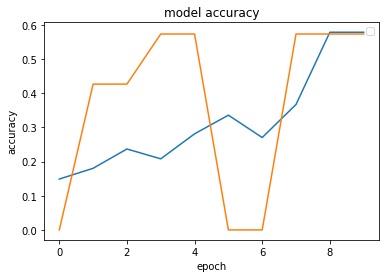

In [76]:
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.show()

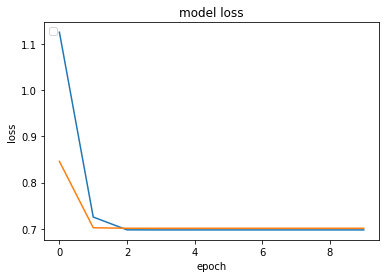

In [77]:
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()

In [78]:
model.save('model.m5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.m5/assets
